In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [5]:
df=pd.read_csv("Dataset.csv")

In [885]:
df_temp=pd.read_csv("Dataset.csv")
df_temp['freetime']
df['freetime']=df_temp['freetime']

In [7]:
df.describe()

,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3
count,649.000000,576.000000,576.000000,649.000000,649.000000,604.000000,649.000000,649.000000,649.000000,580.000000,649.000000,614.000000,649.000000,611.000000,603.000000,610.000000
mean,2.514638,2.303819,1.574653,0.221880,3.930663,3.172185,3.184900,1.502311,3.536210,3.746552,11.399076,11.586319,11.906009,16.747954,1.913765,2.262295
std,1.134552,1.111076,0.744592,0.593235,0.955717,1.044684,1.175766,0.924834,1.446259,4.732890,2.745265,2.927878,3.230656,1.216812,0.830798,1.285279
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,16.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,2.000000,11.000000,11.000000,12.000000,17.000000,2.000000,2.000000
75%,4.000000,3.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,13.000000,13.000000,14.000000,18.000000,2.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,22.000000,4.000000,5.000000


Checking different column titles


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     649 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        649 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  649 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      649 non-null    object 
 19  internet    649 non-null    o

Investigating number of null values in columns

In [8]:
df.nunique()

school         2
sex            2
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
famrel         5
freetime       5
goout          5
Dalc           5
health         5
absences      24
G1            17
G2            16
G3            17
Feature_1      8
Feature_2      4
Feature_3      5
romantic       2
dtype: int64

No unwanted/nonsense values exist in any of the columns and all values are as specified and in required format

In [9]:
mode_fedu=df['Fedu'].mode()[0]
df['Fedu']=df['Fedu'].fillna(mode_fedu)

Replacing Fedu column with mode of values

In [10]:
mode_tt=df['traveltime'].mode()[0]
df['traveltime']=df['traveltime'].fillna(mode_tt)
mode_tt

np.float64(1.0)

Replacing travetime witih mode value

In [11]:
mode_ft=df['freetime'].mode()[0]
df['freetime']=df['freetime'].fillna(mode_ft)
mode_ft

np.float64(3.0)

Replacing freetime with mode value

In [107]:
input_cols=list(['school','sex','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','failures','schoolsup','famsup','paid','activities','nursery','internet','famrel','freetime','goout','Dalc','health','G1','G2','G3'])
target_col='higher'

Creating a predictive model to predict missing values for some coloumns

In [108]:
train_input=df[input_cols][df[target_col].notna()].copy()
train_target=df[target_col].dropna()

Taking training values from non null rows of target 

In [109]:
numeric_cols=train_input.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_input.select_dtypes('object').columns.tolist()

Seperating numeric and categorical columns in the training set

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_input[numeric_cols])
train_input[numeric_cols]=scaler.transform(train_input[numeric_cols])

Scaling training input values in the range of 0-1

In [111]:
from sklearn.preprocessing import OneHotEncoder
encoder =OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(train_input[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
train_input[encoded_cols]=encoder.transform(train_input[categorical_cols])

Converting categorical columns by onehot encoding,creating new onehot vector columns for each categorical data and adding it to the original training dataset

In [112]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
# from sklearn.linear_model import LinearRegression
# model2=LinearRegression()

Creating LinearRegression and LogisticRegression objects for predictive functions

In [113]:
model.fit(train_input[numeric_cols+encoded_cols],train_target)

LogisticRegression(solver='liblinear')

Performing LinearReg fit 

In [114]:
model.coef_

array([[ 0.62945457,  0.70911766,  0.1764697 , -1.22040093,  0.26005757,
        -0.50477335, -0.18711013, -0.57133471,  0.31103203,  2.06809009,
         1.48501805,  1.43875221, -0.1814831 ,  0.10017751,  0.07679237,
        -0.15809796, -0.17487158,  0.093566  , -0.17509279,  0.09378721,
        -0.16989082,  0.08858524, -0.73910841,  0.85475782, -0.36924449,
        -0.27223329,  0.44452279, -0.30434888, -0.15505024,  0.19585053,
         0.3174163 , -0.1351733 , -0.05583908,  0.03485333, -0.20665429,
         0.14633446,  0.14323302,  0.37401666, -0.59855526, -0.67491707,
         0.59361148, -0.31228401,  0.23097842, -0.24126329,  0.1599577 ,
        -0.10674015,  0.02543456, -0.0782446 , -0.00306098,  0.03939974,
        -0.12070533]])

Obtaining coefficients(weights=w) for LinearRegression model obtained

In [116]:
x_train=train_input[numeric_cols+encoded_cols]
train_preds=list(model.predict(x_train))
train_preds


['yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 

Extracting final input setc for training and finall storing the predicted output

In [94]:
def rmse(predictions, targets):
    predictions = np.array(predictions)
    targets = np.array(targets)
    return np.sqrt(np.mean((predictions - targets) ** 2))

Defining rmse function to evaluate error in LinearReg model

In [95]:
rmse(train_preds,train_target)

np.float64(4.347158689280679)

Implementing rmse function

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(train_target,train_preds)

0.8917975567190227

Obtaining accuracy score for Logistic Regression models

In [118]:
train_probs=model.predict_proba(x_train)
train_probs

array([[0.11669682, 0.88330318],
       [0.18986128, 0.81013872],
       [0.04752892, 0.95247108],
       ...,
       [0.12292142, 0.87707858],
       [0.06900665, 0.93099335],
       [0.16898724, 0.83101276]], shape=(573, 2))

Getting probabilities for predicted outputs in Logistic Regression model

In [119]:
inputs_to_predict=df[df[target_col].isna()][input_cols]

Extracting values of other columns from null rows of target column

In [120]:
inputs_to_predict[numeric_cols]=scaler.transform(inputs_to_predict[numeric_cols])

For numeric values in Logistic regression,performing scaling in 0-1 range

In [121]:
inputs_to_predict[encoded_cols]=encoder.transform(inputs_to_predict[categorical_cols])

Onehot encoding of actual inputs

In [122]:
x_input_to_predict=inputs_to_predict[numeric_cols+encoded_cols]
prediction=model.predict(x_input_to_predict)
prediction

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes'], dtype=object)

Obtaining final prediction

In [123]:
prob=model.predict_proba(x_input_to_predict)
prob

array([[0.01741893, 0.98258107],
       [0.010013  , 0.989987  ],
       [0.00266816, 0.99733184],
       [0.01188079, 0.98811921],
       [0.04980879, 0.95019121],
       [0.05344995, 0.94655005],
       [0.00427744, 0.99572256],
       [0.01038083, 0.98961917],
       [0.07140787, 0.92859213],
       [0.03244937, 0.96755063],
       [0.11468198, 0.88531802],
       [0.13948004, 0.86051996],
       [0.00642357, 0.99357643],
       [0.01212396, 0.98787604],
       [0.01467459, 0.98532541],
       [0.01331758, 0.98668242],
       [0.05363948, 0.94636052],
       [0.02339748, 0.97660252],
       [0.00867342, 0.99132658],
       [0.03770386, 0.96229614],
       [0.19592415, 0.80407585],
       [0.01344694, 0.98655306],
       [0.06529913, 0.93470087],
       [0.18647774, 0.81352226],
       [0.05779474, 0.94220526],
       [0.02953512, 0.97046488],
       [0.00603763, 0.99396237],
       [0.03971922, 0.96028078],
       [0.07242144, 0.92757856],
       [0.08560533, 0.91439467],
       [0.

Probabilities of predicted outputs

In [124]:
null_indices = df[df[target_col].isnull()].index
# prediction=prediction.round().astype(int)
df.loc[null_indices, target_col] = prediction

Replacing null indices of target colums with predicted outputs

Now we have all input columns except F!,F2,F3 filled with either predicted values or some meaningful statistical values


Next step is performing EDA to infer hidden features and relationships between targets and inputs

In [126]:
df.to_csv("cleandata.csv", index=False)

storing the cleaned dataset to a new csv file

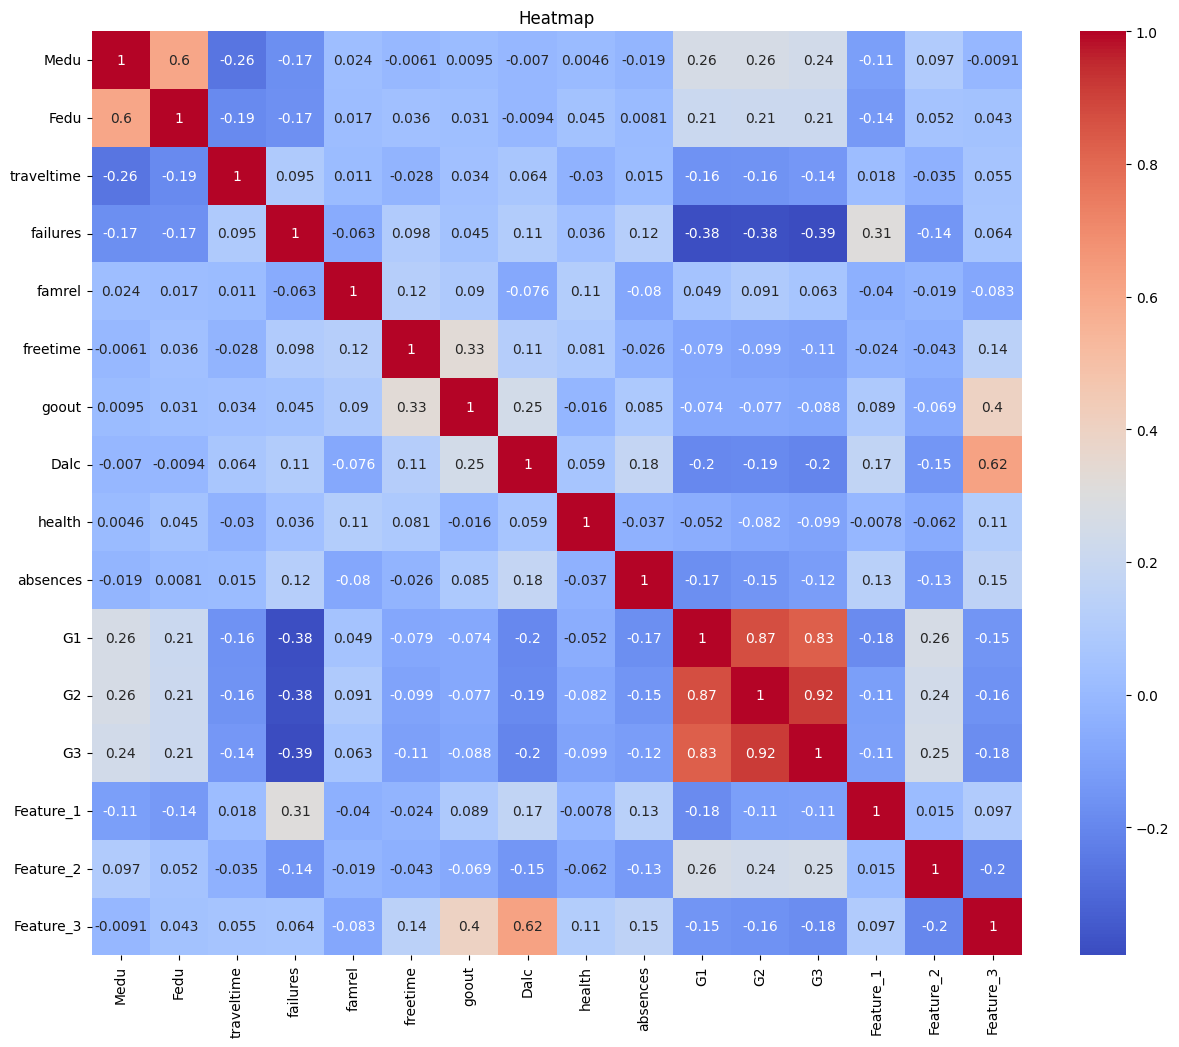

In [206]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(15, 12))
sb.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

Feature1:Not much correlations with any of the features.


Fair relation with (+)FAILURES

Very less relation with (-)Medu,Fedu,and grades

Feature2:Fair relation with GRADES

Slight negative relation with F3


very less negative relation with failures

Feature3:Good positive relation with alcohol weekly consumption


fair positive reln with go out with friends

Slight negative relation with grades

slight positive relation with health and absences

In [166]:
df['Feature_3'].unique()

array([ 1.,  3.,  2.,  4., nan,  5.])

Feature_3 is some index between 1-5

In [162]:
fig = px.scatter(df, x='Dalc', y='Feature_3', 
                 title='Feature_3 vs Weekday Alcohol Consumption',
                 trendline='ols')
fig.show()


positive increasing relationship with alcohol consumption

In [208]:
fig = px.histogram(df,x='Feature_3',color='sex',title='Feature_3 frequency')
fig.show()


feature_3 shows a general decline in count with increasing index(exponential decrease)

Implies it is not a preferable feature/habit

The normal ratio of males to females in the dataset is close to 2:3 whereas in the feature_3 with increasing index it exceeds 1:2 indicative that males are more likely into feature_3 with higher indices

In [198]:
fig = px.scatter(df, x='goout', y='Feature_3',color='sex',title='Feature_3 vs Going Out Frequency',trendline='ols')
fig.show()

feature3 is highly linearly correlative with going out with friends and is generally trendy in males


from research,percentage of males is generally higher in partying,bad habits(such as smoking),and socializing

hence concluding that Feature_3 can be partying/socializing/indulgement in bad impact friendship circle

In [204]:
df['Feature_2'].unique()

array([ 2., nan,  3.,  1.,  4.])

Feature_2 is also some kind of index ranging from 1-4

In [210]:
fig = px.histogram(df,x='Feature_2',color='famsup',title='Feature_2 distribution across gender')
fig.show()

Feature_2 has a gaussian distribution indicative that it is a feature/habit that is natural/common and uniformly distributed about its mean

Students with fammily support for education tend to have higher values of feature_2 than those without with the ratio increasing as feature_2 index increases 

Close relation with academic performance

In [196]:
fig = px.scatter(df, x='G3', y='Feature_2',color='famsup',opacity=0.2,title='Feature_2 vs Grades',trendline='ols')
fig.show()

Grades has a positive correlation

Also students with family support have higher gradient of grades

In [216]:
fig = px.box(df, x='Feature_3', y='Feature_2',title='Feature_2 vs Feature_3')
fig.show()

The median of Feature_2 shifts downward with increasing values of Feature_3


Hence Feature_2 can be concluded as some academic performance index/studytime

In [229]:
fig = px.histogram(df,x='Feature_1',color='failures',title='Feature_1 frequency')
fig.show()

Gaussian distribution with slighty left skew indictative that the feature_1 is a natural distribution but more common is the lower values(15-18) 

failures tend to increase with higher feature_1 values with highest indices beaing that of 2-3 failures students

In [227]:
fig = px.box(df,x='Feature_1',y='G3')
fig.show()